<a href="https://colab.research.google.com/github/XLDiaz/MLearning_HEConsumption/blob/main/MA_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Detección de Anomalías:

In [12]:
from sklearn.metrics import  mean_absolute_error
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("/content/drive/MyDrive/XLDiaz/MLearning_HEConsumption/Data/HEC_Data.csv", delimiter= ",", infer_datetime_format= True)
df=df.loc[:,['Fecha','Potencia_Activa']]
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha',inplace=True)

In [24]:
#   Una funcion para determinar Outliers por medios estadisticos
#   Fija bandas de confianza (basadas en la destvacionn estandar y la media)
#   Los datos que sobrepasen o se queden por debajo de las bandas se resaltan como outliers
#   Posee un factor de desviacion que calibra la importancia que le damos a la desviacion estandar y por lo tanto
#   la distancia entre la media de la serie de tiempo t las bandas de confianza que esta fijado a 1.50



def plotMovingAverage(series, window, deviation_factor=1.50, plot_bands=False, plot_anomalies=False, plot_lower = True, plot_upper = True):

    plt.style.use("seaborn-darkgrid")

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(20,8))
    plt.title(f"Moving average\n window size = {window}")
    plt.plot(series[window:], label="TimeSeries")
    plt.plot(rolling_mean, color = "green", label="Media")

    # Bandas de confianza
    if plot_bands:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
    
        lower = rolling_mean - (mae + deviation_factor * deviation)
        plt.plot(lower, "r--", label="Upper / Lower", color = "red")
    
        upper = rolling_mean + (mae + deviation_factor * deviation)
        plt.plot(upper, "r--", label="Upper / Lower", color = "red")
    

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            if plot_lower:
                anomalies[series<lower] = series[series<lower]
            if plot_upper:
                anomalies[series>upper] = series[series>upper]
            plt.plot(anomalies, "ro", markersize=5, color = "black")

    plt.legend(loc="best")
    plt.title("Detección de Anomalías")  
    #plt.style.use('tableau-colorblind10')
    plt.show()

    return anomalies.dropna(axis=0)

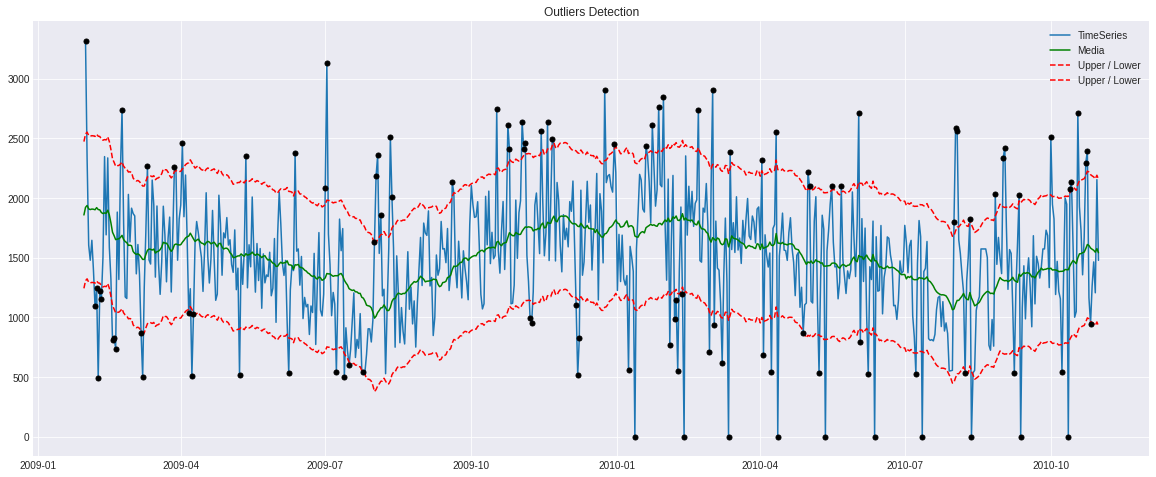

In [20]:
df1 = df.resample('D').sum()
df2 = df1.loc["2009-01":"2010-10"]
data = (df2['Potencia_Activa'])

anomalies_df = plotMovingAverage(pd.DataFrame(data), 30,deviation_factor=0.5, plot_bands=True, plot_anomalies=True)

In [21]:
df2 = pd.read_csv("/content/drive/MyDrive/XLDiaz/MLearning_HEConsumption/Data/household_power_consumption.csv",  header=0, low_memory=False, infer_datetime_format=True, parse_dates=True, index_col="Fecha")
df2.head()

,Potencia_Activa,Consumo_Pico
Fecha,,
2007-01-01,45.816733,3.484167
2007-01-02,21.153933,7.913567
2007-01-03,16.900900,3.045933
2007-01-04,54.323533,7.856567
2007-01-05,45.222733,12.473300


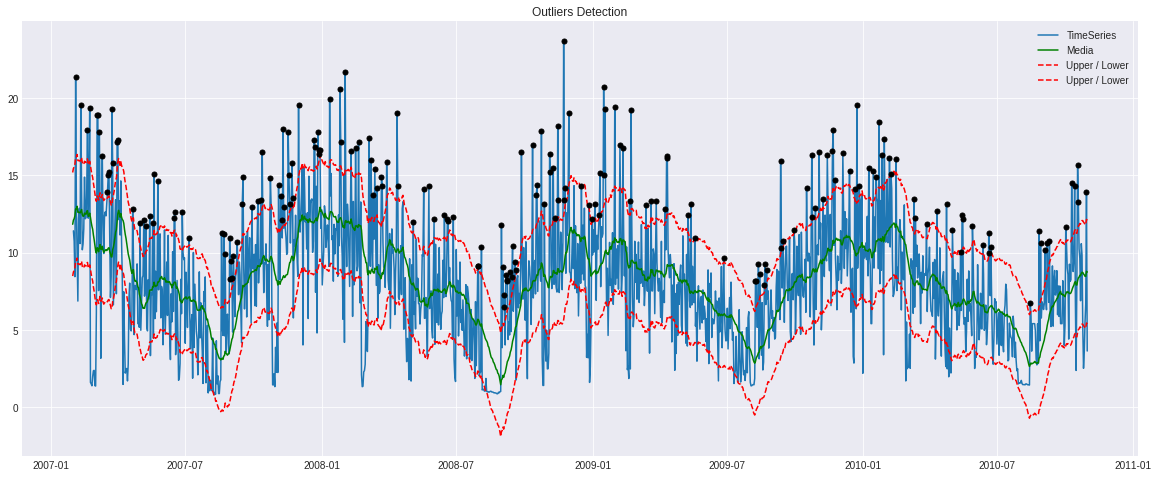

,Consumo_Pico
Fecha,
2007-02-03,21.378833
2007-02-10,19.548133
2007-02-19,17.943833
2007-02-22,19.36319
2007-03-04,18.911167
...,...
2010-10-10,14.520233
2010-10-14,14.335333
2010-10-18,15.704833


In [23]:
data = (df2['Consumo_Pico'])

plotMovingAverage(pd.DataFrame(data), 30,deviation_factor=0.2, plot_bands=True, plot_anomalies=True, plot_lower=False)